In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
bisiklet_df = pd.read_csv('bisiklet.csv')
bisiklet_df.head()

,Unnamed: 0,Id,tarih,mevsim,yıl,ay,tatil günü mü,gün,iş günü mü,havadurumu,hava sıcaklığı,hissedilen hava sıcaklığı,nem,rüzgar hızı,kiralanan bisiklet sayısı
0,0,1,2011-01-01,bahar,2011,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,2,2011-01-02,bahar,2011,1,0,0,0,2,14.902598000000000,17.68695,69.6087,16.652113,801
2,2,3,2011-01-03,bahar,2011,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,3,4,2011-01-04,bahar,2011,1,0,2,1,1,8.200000000000000,10.60610,59.0435,10.739832,1562
4,4,5,2011-01-05,bahar,2011,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [55]:
bisiklet_df.drop(columns={'Unnamed: 0', 'tarih'}, inplace=True)

In [56]:
bisiklet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         731 non-null    int64  
 1   mevsim                     731 non-null    object 
 2   yıl                        731 non-null    int64  
 3   ay                         731 non-null    int64  
 4   tatil günü mü              731 non-null    int64  
 5   gün                        731 non-null    int64  
 6   iş günü mü                 731 non-null    int64  
 7   havadurumu                 731 non-null    int64  
 8   hava sıcaklığı             731 non-null    object 
 9   hissedilen hava sıcaklığı  731 non-null    float64
 10  nem                        731 non-null    float64
 11  rüzgar hızı                731 non-null    float64
 12  kiralanan bisiklet sayısı  731 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 7

In [57]:
bisiklet_df['mevsim'].value_counts()

sonbahar    188
yaz         184
bahar       181
kış         178
Name: mevsim, dtype: int64

In [58]:
bisiklet_df.replace('?', None, inplace=True)

Id                           None
mevsim                       None
yıl                          None
ay                           None
tatil günü mü                None
gün                          None
iş günü mü                   None
havadurumu                   None
hava sıcaklığı               None
hissedilen hava sıcaklığı    None
nem                          None
rüzgar hızı                  None
kiralanan bisiklet sayısı    None
dtype: object

In [59]:
bisiklet_df.isnull().sum()

Id                           0
mevsim                       0
yıl                          0
ay                           0
tatil günü mü                0
gün                          0
iş günü mü                   0
havadurumu                   0
hava sıcaklığı               0
hissedilen hava sıcaklığı    0
nem                          0
rüzgar hızı                  0
kiralanan bisiklet sayısı    0
dtype: int64

In [60]:
bisiklet_df['hava sıcaklığı'] = bisiklet_df['hava sıcaklığı'].astype(float)

In [61]:
bisiklet_df = pd.get_dummies(bisiklet_df, columns=['mevsim'])
bisiklet_df.head()

,Id,yıl,ay,tatil günü mü,gün,iş günü mü,havadurumu,hava sıcaklığı,hissedilen hava sıcaklığı,nem,rüzgar hızı,kiralanan bisiklet sayısı,mevsim_bahar,mevsim_kış,mevsim_sonbahar,mevsim_yaz
0,1,2011,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,2,2011,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,3,2011,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,4,2011,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,5,2011,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [62]:
bisiklet_df.dtypes

Id                             int64
yıl                            int64
ay                             int64
tatil günü mü                  int64
gün                            int64
iş günü mü                     int64
havadurumu                     int64
hava sıcaklığı               float64
hissedilen hava sıcaklığı    float64
nem                          float64
rüzgar hızı                  float64
kiralanan bisiklet sayısı      int64
mevsim_bahar                   uint8
mevsim_kış                     uint8
mevsim_sonbahar                uint8
mevsim_yaz                     uint8
dtype: object

In [63]:
bisiklet_df.duplicated().any()

False

In [64]:
bisiklet_df.describe()

,Id,yıl,ay,tatil günü mü,gün,iş günü mü,havadurumu,hava sıcaklığı,hissedilen hava sıcaklığı,nem,rüzgar hızı,kiralanan bisiklet sayısı,mevsim_bahar,mevsim_kış,mevsim_sonbahar,mevsim_yaz
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.297397,23.717699,62.789406,12.762576,4504.348837,0.247606,0.243502,0.257182,0.251710
std,211.165812,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.498979,8.148059,14.242910,5.192357,1937.211452,0.431917,0.429489,0.437380,0.434293
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000
25%,183.500000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,3152.000000,0.000000,0.000000,0.000000,0.000000
50%,366.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.295000,24.336650,62.666700,12.125325,4548.000000,0.000000,0.000000,0.000000,0.000000
75%,548.500000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,5956.000000,0.000000,0.000000,1.000000,1.000000
max,731.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000


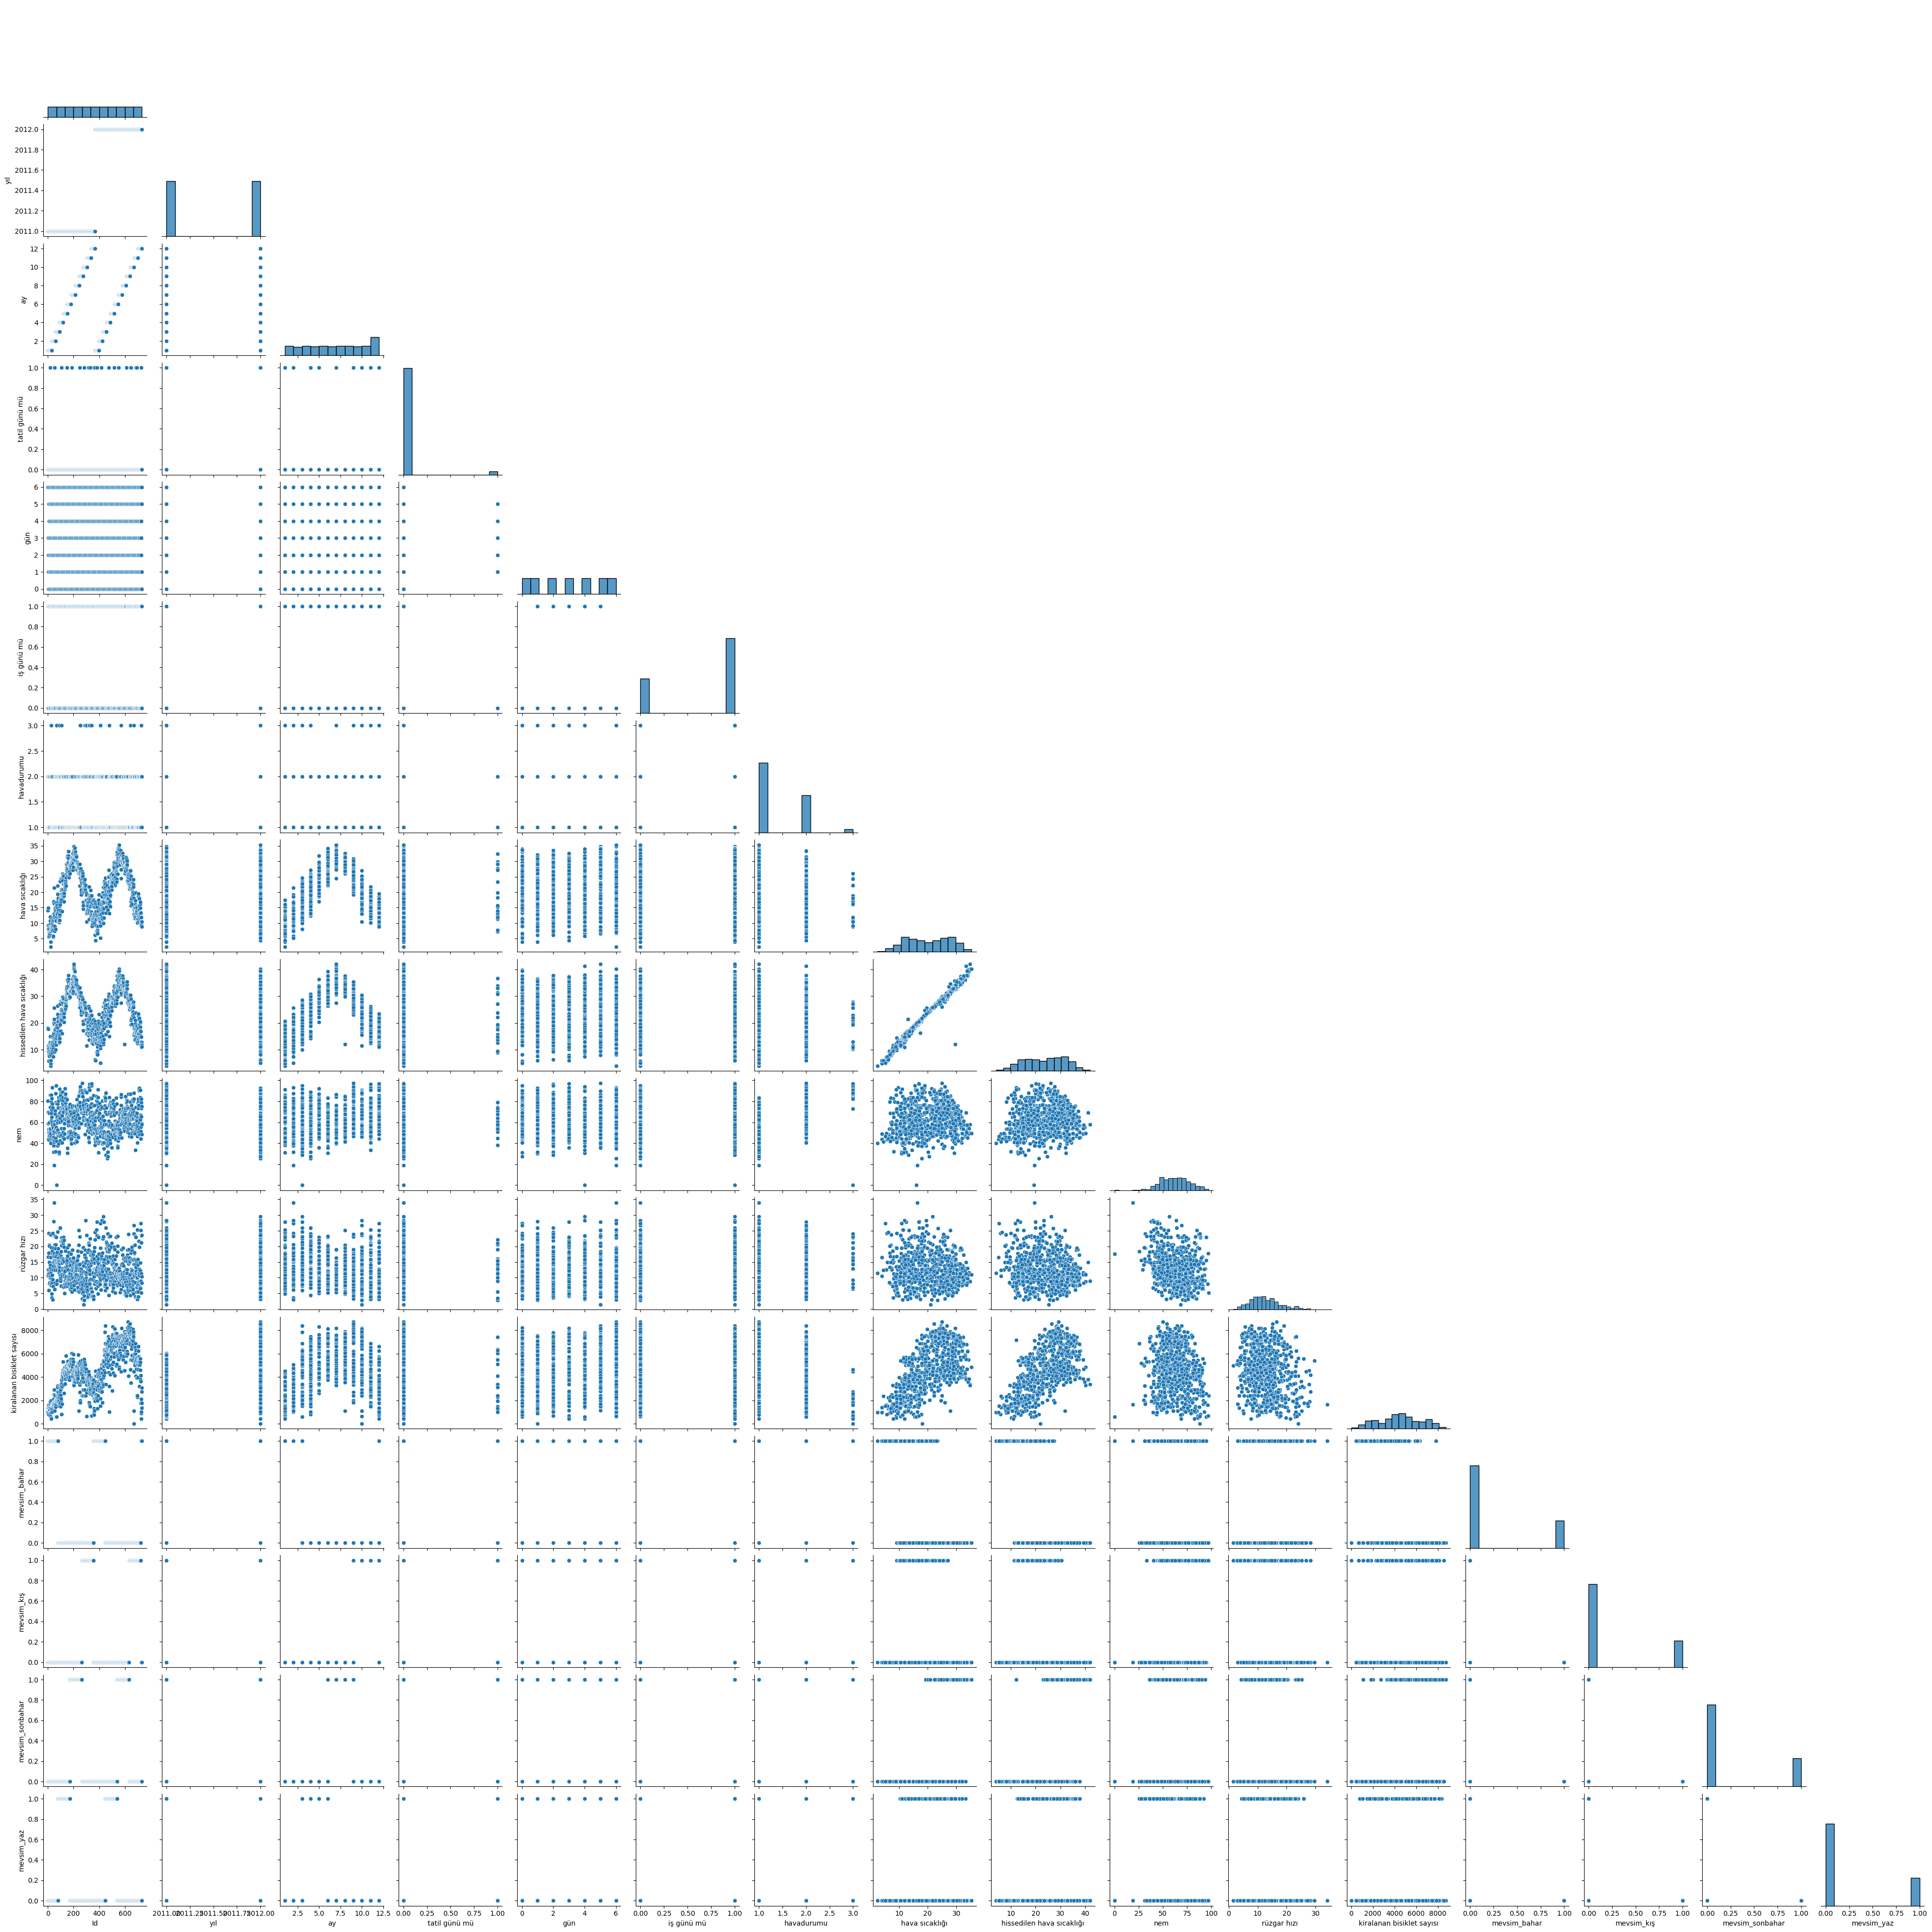

In [65]:
sns.pairplot(bisiklet_df, corner=True)

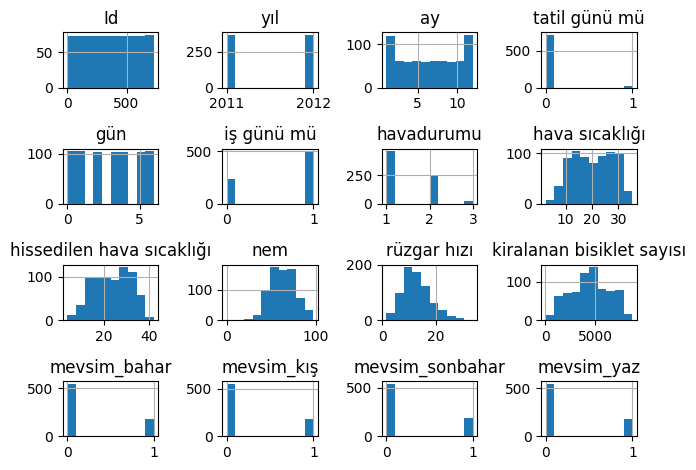

In [66]:
bisiklet_df.hist()
plt.tight_layout()

<AxesSubplot:>

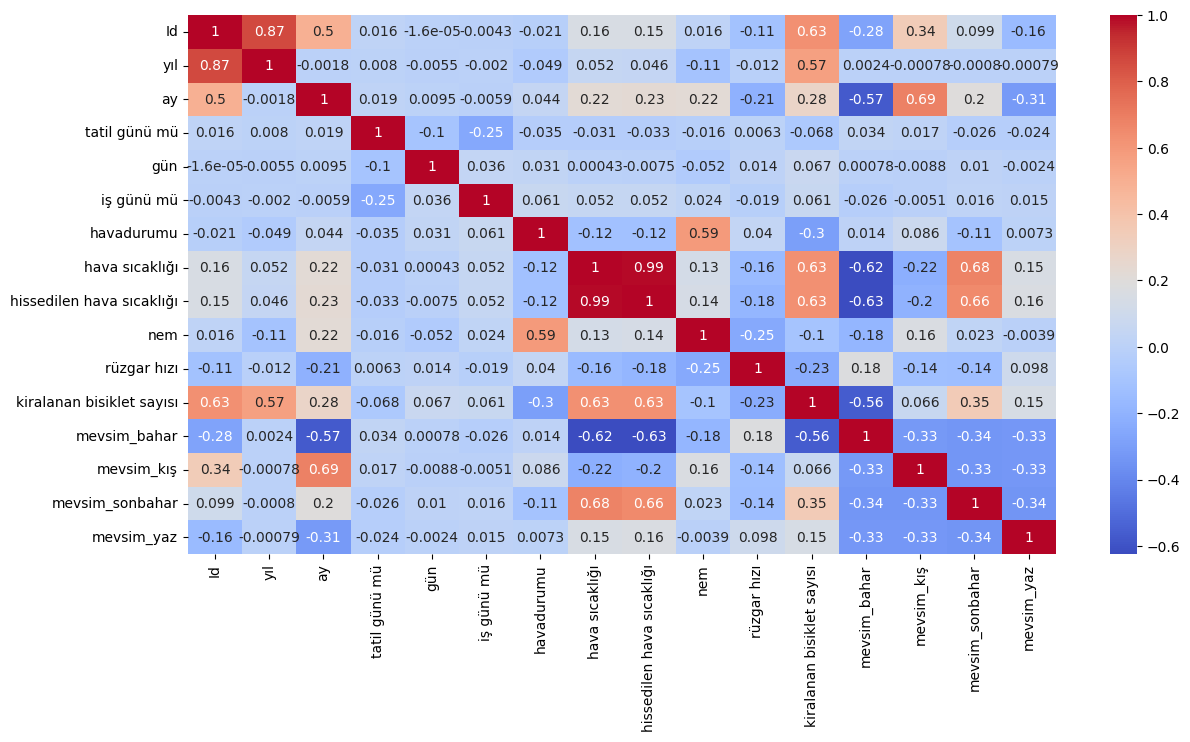

In [67]:
plt.figure(figsize=(14, 7))
sns.heatmap(bisiklet_df.corr(), annot=True, cmap='coolwarm')


In [68]:
X = bisiklet_df.drop(columns={'kiralanan bisiklet sayısı'})
y=bisiklet_df['kiralanan bisiklet sayısı']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores) 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.83153846 0.74345106 0.83147069 0.89939525 0.78153168 0.77942009
 0.6007072  0.68822983 0.87005344 0.89818887]
Cross Validation accuracy: 0.792 +/- 0.091


In [74]:
df = bisiklet_df
df['class'] = np.where(df['kiralanan bisiklet sayısı'] > 5000 , 'greater than 50000', 'less than 5000')
df.head()

,Id,yıl,ay,tatil günü mü,gün,iş günü mü,havadurumu,hava sıcaklığı,hissedilen hava sıcaklığı,nem,rüzgar hızı,kiralanan bisiklet sayısı,mevsim_bahar,mevsim_kış,mevsim_sonbahar,mevsim_yaz,class
0,1,2011,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,less than 5000
1,2,2011,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,less than 5000
2,3,2011,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,less than 5000
3,4,2011,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,less than 5000
4,5,2011,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,less than 5000


In [75]:
X = df.drop(columns={'class', 'kiralanan bisiklet sayısı'})
y= df['class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores) 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.87272727 0.85454545 0.92727273 0.89090909 0.83636364 0.85454545
 0.81818182 0.87272727 0.90740741 0.90740741]
Cross Validation accuracy: 0.874 +/- 0.033
